# Classical Linear Regression

## Contents

1. Linear regression closed-form solution
2. sklearn package

## Notes

- Linear regression: $y=X\beta$.

- Closed-form solution: Ordinary least square solution (OLS) provides a closed-form estimation called normal equation: $\hat{\beta}=(X^T X)^{-1}X^T y$.
In the case of linear regression, it is also Maximum Likelihood Estimation (MLE).

#### Reference:

https://letianzj.github.io/classical-linear-regression.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Closed-form Solution

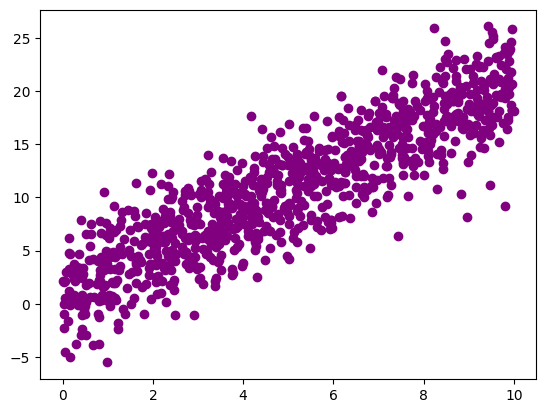

In [22]:
sample_size = 1000
sigma_e = 3.0
random_num_generator = np.random.RandomState(123)
x = 10.0 * random_num_generator.rand(sample_size)
e = random_num_generator.normal(0, sigma_e, sample_size)
y = 1.0 + 2.0 * x + e  # y = a + b*x where a = 1.0 and b = 2.0

plt.scatter(x, y, color='purple')
plt.show()

In [23]:
# Normal equation to estimate the model parameters
X = np.vstack((np.ones(sample_size), x)).T # shape: (sample_size, 2); np.vstack() stacks row-wise
params_closed_form = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(f"parameters: {params_closed_form[0]:.7f}, {params_closed_form[1]:.7f}")

parameters: 1.0762838, 1.9658812


### Sklearn package

In [35]:
from sklearn.linear_model import LinearRegression

lm_model = LinearRegression(copy_X=True, fit_intercept=True)
lm_model.fit(x.reshape(-1,1), y)
print(f"parameters: {lm_model.intercept_.item():.7f}, {lm_model.coef_.item():.7f}")

parameters: 1.0762838, 1.9658812


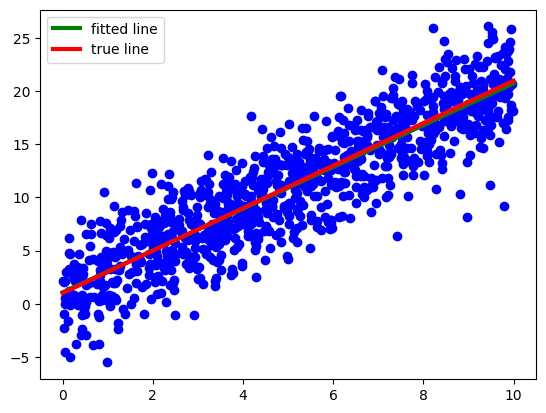

In [48]:
xfit = np.linspace(0, 10, sample_size)
yfit = lm_model.predict(xfit.reshape(-1,1))
ytrue = 2.0 * xfit + 1.0
plt.scatter(x, y, color='blue')
plt.plot(xfit, yfit, color='green', label='fitted line', linewidth=3)
plt.plot(xfit, ytrue, color='red', label='true line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

In [42]:
# R-square
r_square = lm_model.score(x.reshape(-1,1), y)
print(f"R-square: {r_square:.7f}")

R-square: 0.7902624


In [46]:
# The square root of R-square is correlation coefficient
from scipy.stats import pearsonr
print(f"Its square root is Pearson correlation coefficient: {np.sqrt(r_square):.7f} == {pearsonr(x, y)[0]:.7f}")

Its square root is Pearson correlation coefficient: 0.8889670 == 0.8889670


R square indicates that 79% of the variability in y can be explained by x.
In a simple linear regression, its square root is Pearson correlation coefficient between x and y, which shows 88.9% positive correlated.